<a href="https://colab.research.google.com/github/arju-gituser/Python-Codes/blob/master/Congressional_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
 
from google.colab import files
uploaded = files.upload()

Saving house-votes-84_csv.csv to house-votes-84_csv.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['house-votes-84_csv.csv']))
#df.info()
#df.describe()
#df.head().T

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
#df[~ df['Unnamed: 13'].isna()].T
#Dropping the column
#df.drop('Unnamed: 13',axis=1,inplace=True)

df.describe()


,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,nti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa,Class
count,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435
unique,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2
top,n,y,y,n,y,y,y,y,y,y,n,n,y,y,n,y,democrat
freq,236,195,253,247,212,272,239,242,207,216,264,233,209,248,233,269,267


In [6]:
df["Class"] = [1 if i =="democrat" else 0  for i in df.Class]

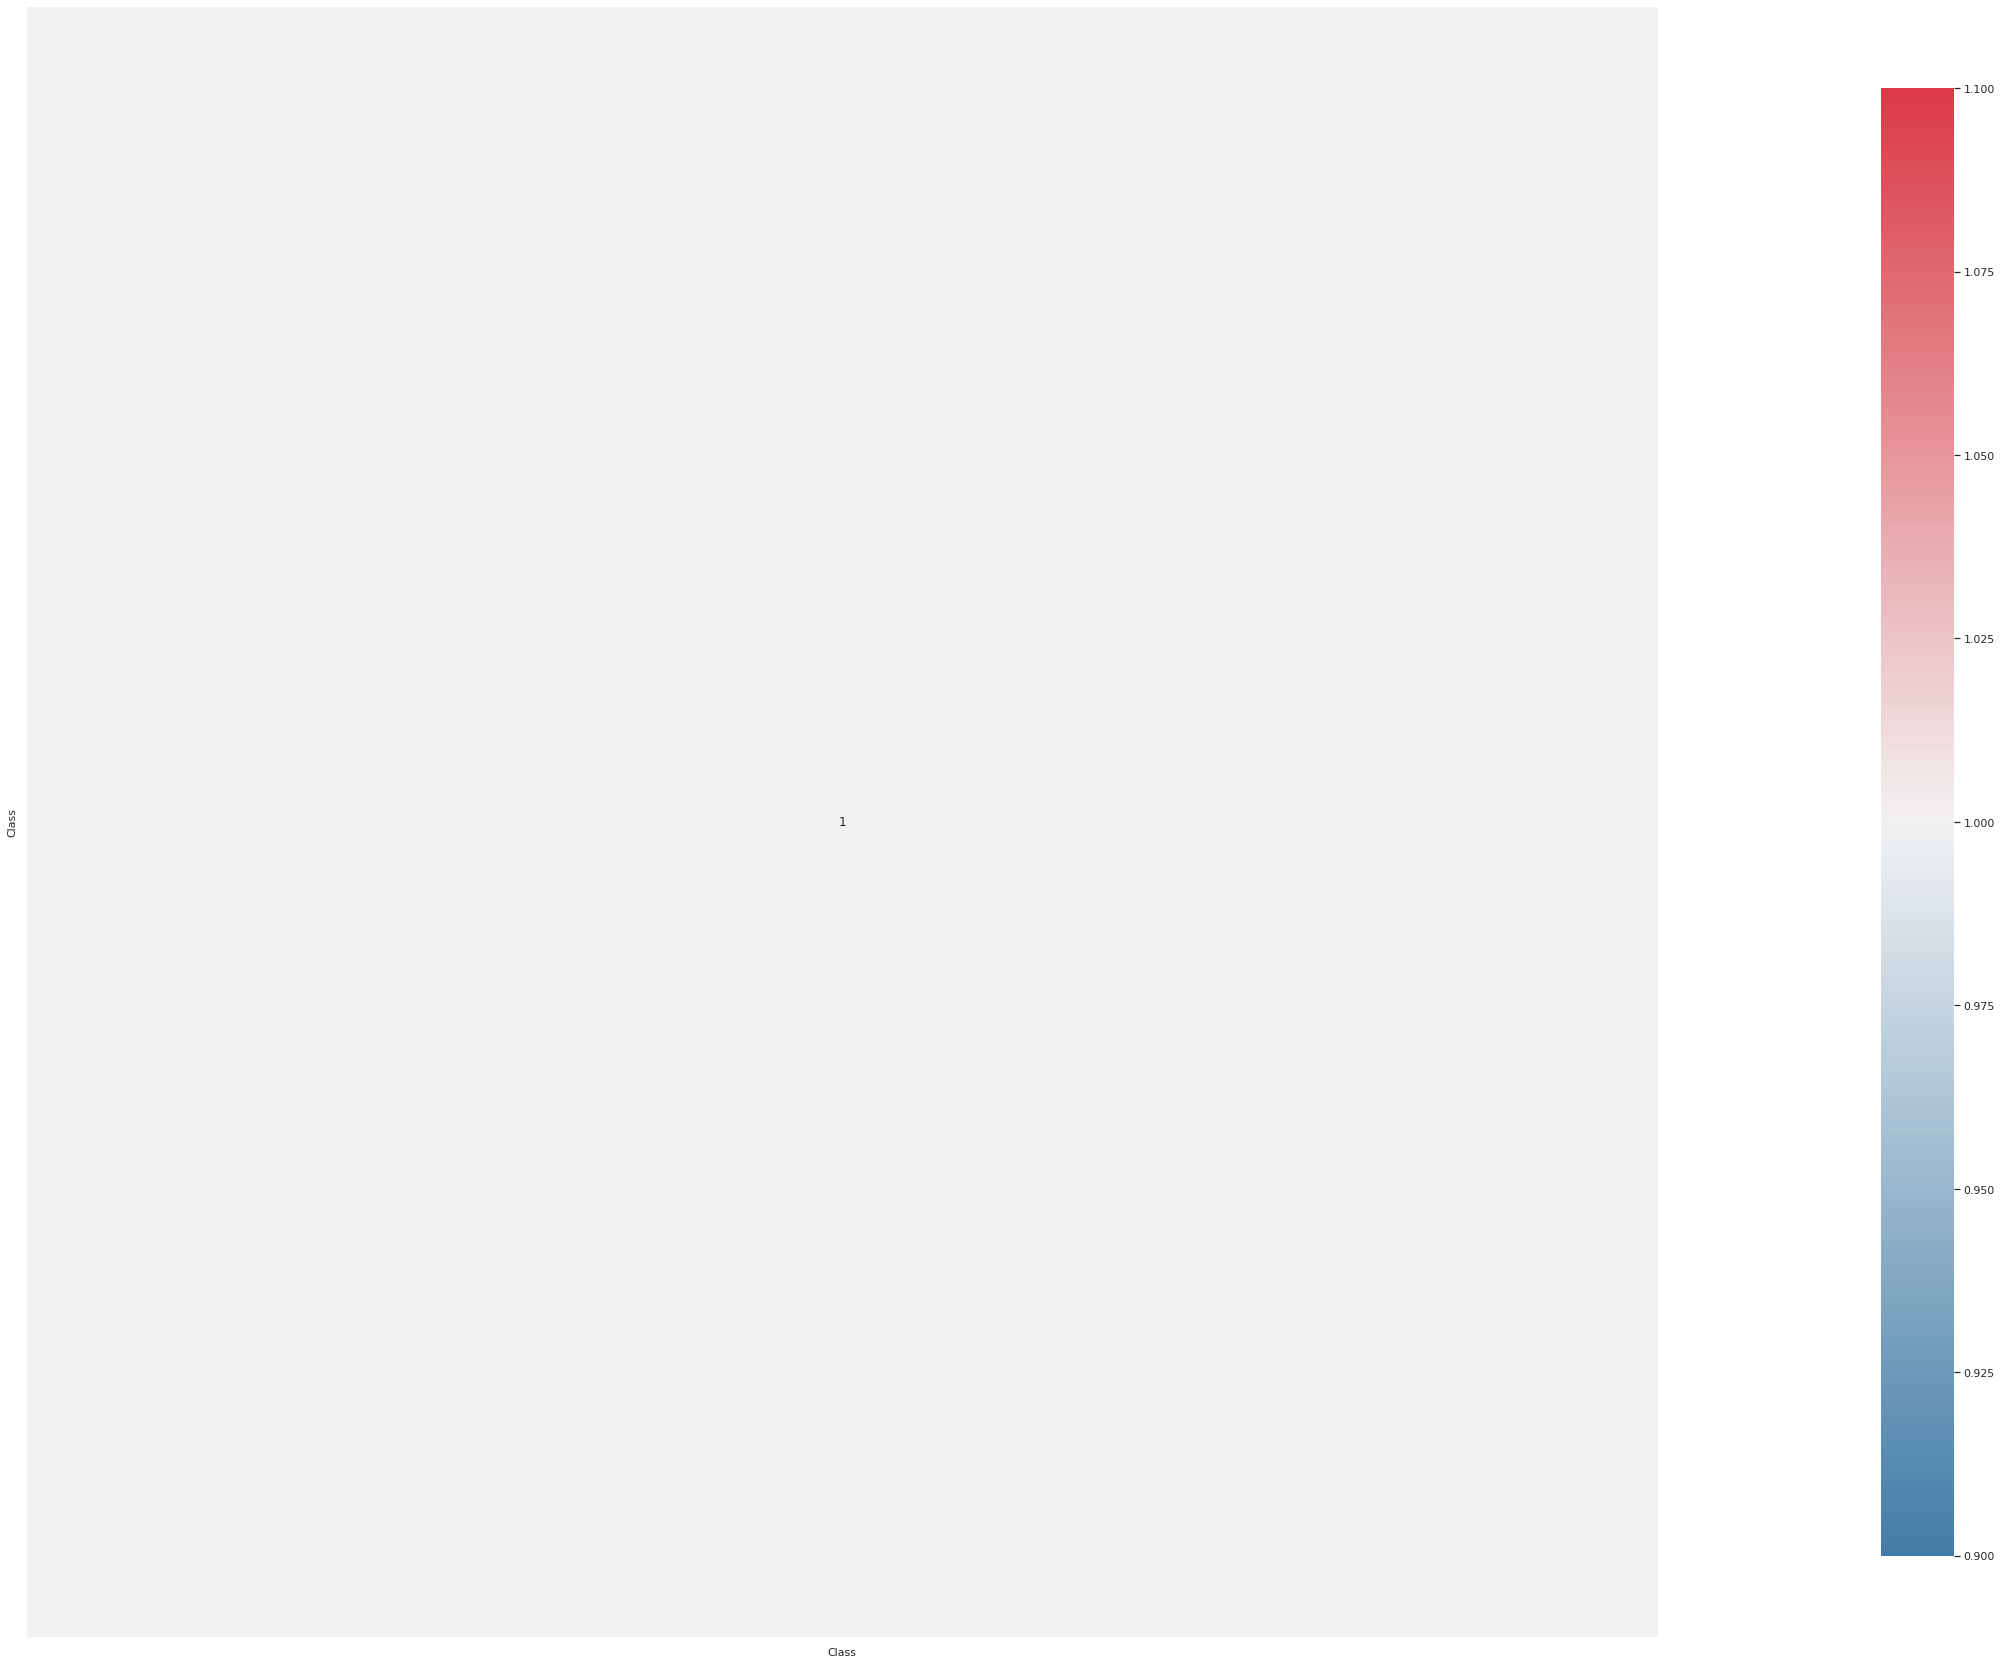

In [7]:
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 80 , 30 ) )
    cmap = sns.diverging_palette( 240 , 10 , as_cmap = True )
    _ = sns.heatmap(corr,cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 })
plot_correlation_map(df)

In [8]:
# Encode columns into numeric
from sklearn.preprocessing import LabelEncoder
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

[0.01940297 0.01416636 0.15463324 0.3037877  0.0894135  0.01719051
 0.03902008 0.05673981 0.04230652 0.01303751 0.0497097  0.05878227
 0.02763229 0.05482526 0.03718976 0.02216253]


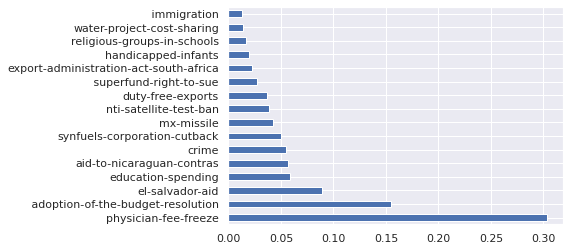

In [10]:
#Feature Importance
#Bagged decision trees like Random Forest and Extra Trees can be used to estimate the importance of features.
#We can see that we are given an importance score for each attribute where the larger score the more important the attribute
#In the example below we construct a ExtraTreesClassifier classifier for the  dataset.
X = df.iloc[:,0:16]  #independent columns
y = df.iloc[:,-1]    #target column 
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()

In [12]:
#Univariate Selection
#provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = df.iloc[:,0:16] #independent columns
y = df.iloc[:,-1] #target column
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] #naming the dataframe columns
print(featureScores.nlargest(20,'Score')) #print 10 best features

                                     Specs      Score
3                     physician-fee-freeze  64.539710
4                          el-salvador-aid  40.523601
7                aid-to-nicaraguan-contras  35.528776
2        adoption-of-the-budget-resolution  35.483522
11                      education-spending  33.855293
13                                   crime  24.180585
14                       duty-free-exports  21.476296
8                               mx-missile  20.919070
12                  superfund-right-to-sue  20.568940
6                   nti-satellite-test-ban  18.566755
5              religious-groups-in-schools  12.936973
0                      handicapped-infants  10.837171
10            synfuels-corporation-cutback  10.698866
15  export-administration-act-south-africa   0.742409
9                              immigration   0.449389
1               water-project-cost-sharing   0.022770


In [15]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import cross_val_score
y1 = df['Class']

### Relf: 20,9,4,10,2,13,17,12,6,3,18,11,19,1,14,15,8,5,16,7 : 20
#GR: 20,9,8,17,4,10,11,2,7,1,12,3,19,6,15,14,13,5,16,18 : 20(numtonominal)
#Infogain: 20,9,4,8,10,2,17,1,7,11,3,12,6,14,19,5,13,15,16,18 : 20

#Mean: 20, 1,3, 12,10,7,6,11,15,18,5,13,16,19,2,14,4,9,17,8
#Mean2:20,9,4,8,10,2,17,12,11,,3,13,1,6,19,18,14,15,7,5,16(IG+RF+GR)
#x5=df[['Att20','Att9','Att4','Att10','Att2','Att17','Att12','Att13','Att11',]]
#print(x5)
# splitting into three sets
X_trainval, X_test, Y_trainval, Y_test = train_test_split(X, y1, test_size=0.10, random_state=42)
# Feature scaling
scaler = MinMaxScaler().fit(X_trainval)
X_trainval_scaled = scaler.transform(X_trainval)
X_test_scaled = scaler.transform(X_test)


Random Forest

Best parameters set found on development set:
{'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto', 'n_estimators': 200}


Confusion Matrix:
[[17  1]
 [ 1 25]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       0.96      0.96      0.96        26

    accuracy                           0.95        44
   macro avg       0.95      0.95      0.95        44
weighted avg       0.95      0.95      0.95        44



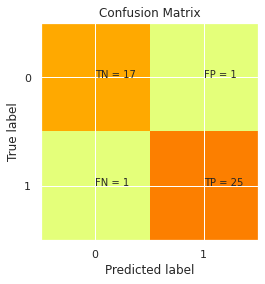

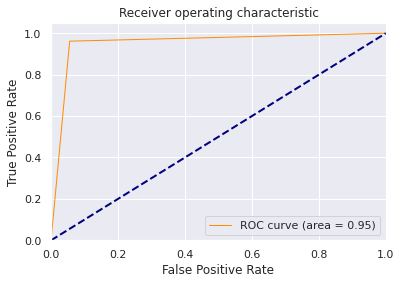


Acuuracy Of the Model:  0.9545454545454546 




In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, auc

acc = [] # list to store all performance metric

from sklearn import metrics
def plot_confusion_metrix(Y_test,model_test):
    cm = metrics.confusion_matrix(Y_test, model_test)
    plt.figure(1)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['0','1']
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()
from sklearn.metrics import roc_curve, auc
def report_performance(model):

    model_test = model.predict(X_test)

    print("\n\nConfusion Matrix:")
    print("{0}".format(metrics.confusion_matrix(Y_test, model_test)))
    print("\n\nClassification Report: ")
    print(metrics.classification_report(Y_test, model_test))
   #cm = metrics.confusion_matrix(Y_test, model_test)
    plot_confusion_metrix(Y_test, model_test)

def roc_curves(model):
    predictions_test = model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(predictions_test,Y_test)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
total_models = ['GridSearchCV','SVC','DecisionTreeClassifier','XGBClassifier','LGBMClassifier',
                    'ExtraTreesClassifier','GradientBoostingClassifier','AdaBoostClassifier','KNeighborsClassifier',
                    'MLPClassifier','GaussianNB','LogisticRegression']
total_accuracy = {}
for i in total_models:
    total_accuracy[str(i)] = 0
def accuracy(model):
    pred = model.predict(X_test)
    accu = metrics.accuracy_score(Y_test,pred)
    print("\nAcuuracy Of the Model: ",accu,"\n\n")
    total_accuracy[str((str(model).split('(')[0]))] = accu


from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier



print("\nRandom Forest\n")
rfc=RandomForestClassifier(random_state=0)

param_grid = { 
    'n_estimators': [200],
    'max_features': ['auto'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 10,scoring = 'roc_auc')
CV_rfc.fit(X_trainval, Y_trainval.ravel())
print("Best parameters set found on development set:")
print(CV_rfc.best_params_)
report_performance(CV_rfc) 
roc_curves(CV_rfc)
accuracy(CV_rfc)



Confusion Matrix:
[[13  5]
 [ 0 26]]


Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.72      0.84        18
           1       0.84      1.00      0.91        26

    accuracy                           0.89        44
   macro avg       0.92      0.86      0.88        44
weighted avg       0.90      0.89      0.88        44



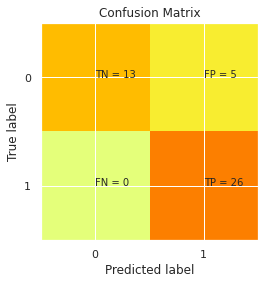

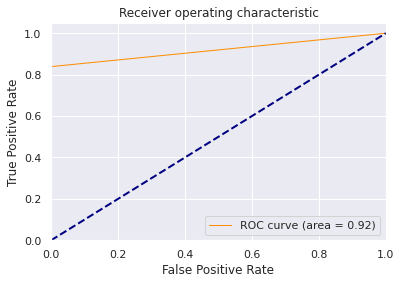


Acuuracy Of the Model:  0.8863636363636364 




In [17]:
clf_dtc = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=0)
clf_dtc.fit(X_trainval, Y_trainval.ravel())
report_performance(clf_dtc) 
roc_curves(clf_dtc)
accuracy(clf_dtc)

LGBMClassifier : 


Confusion Matrix:
[[15  3]
 [ 0 26]]


Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.83      0.91        18
           1       0.90      1.00      0.95        26

    accuracy                           0.93        44
   macro avg       0.95      0.92      0.93        44
weighted avg       0.94      0.93      0.93        44



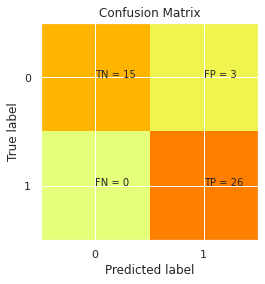

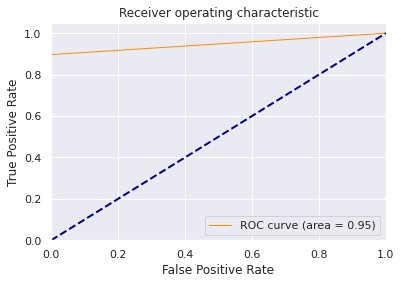


Acuuracy Of the Model:  0.9318181818181818 


ExtraTreesClassifier : 


Confusion Matrix:
[[16  2]
 [ 1 25]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.89      0.91        18
           1       0.93      0.96      0.94        26

    accuracy                           0.93        44
   macro avg       0.93      0.93      0.93        44
weighted avg       0.93      0.93      0.93        44



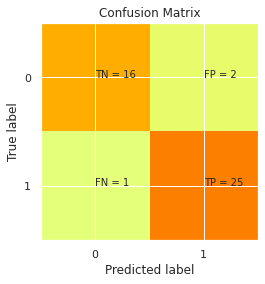

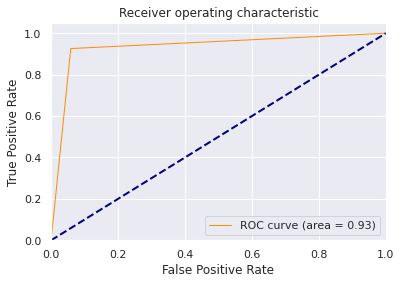


Acuuracy Of the Model:  0.9318181818181818 


GradientBoostingClassifier : 


Confusion Matrix:
[[15  3]
 [ 0 26]]


Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.83      0.91        18
           1       0.90      1.00      0.95        26

    accuracy                           0.93        44
   macro avg       0.95      0.92      0.93        44
weighted avg       0.94      0.93      0.93        44



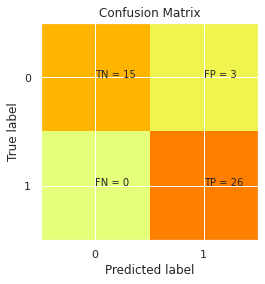

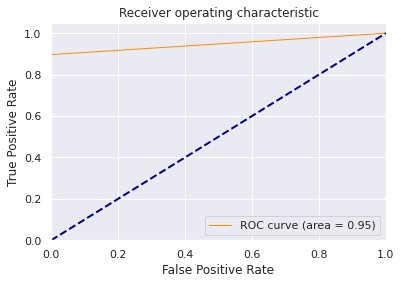


Acuuracy Of the Model:  0.9318181818181818 


AdaBoostClassifier : 


Confusion Matrix:
[[16  2]
 [ 0 26]]


Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        18
           1       0.93      1.00      0.96        26

    accuracy                           0.95        44
   macro avg       0.96      0.94      0.95        44
weighted avg       0.96      0.95      0.95        44



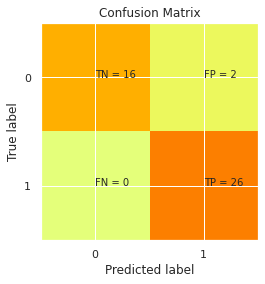

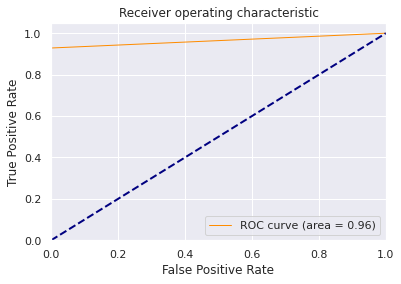


Acuuracy Of the Model:  0.9545454545454546 


KNeighborsClassifier : 


Confusion Matrix:
[[17  1]
 [ 3 23]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.94      0.89        18
           1       0.96      0.88      0.92        26

    accuracy                           0.91        44
   macro avg       0.90      0.91      0.91        44
weighted avg       0.91      0.91      0.91        44



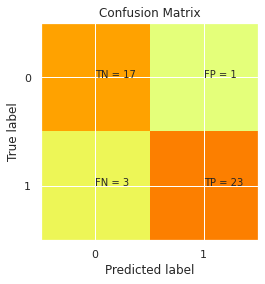

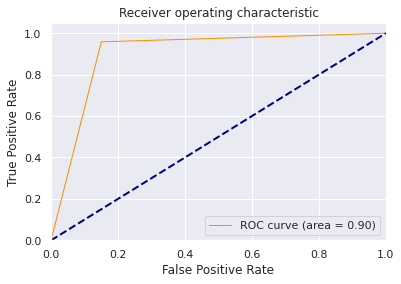


Acuuracy Of the Model:  0.9090909090909091 


MLPClassifier : 


Confusion Matrix:
[[17  1]
 [ 0 26]]


Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.96      1.00      0.98        26

    accuracy                           0.98        44
   macro avg       0.98      0.97      0.98        44
weighted avg       0.98      0.98      0.98        44



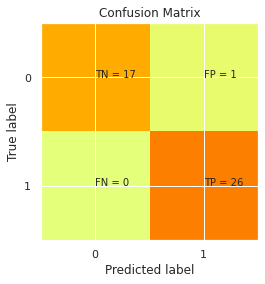

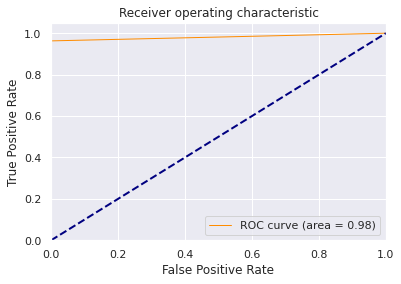


Acuuracy Of the Model:  0.9772727272727273 


GaussianNB : 


Confusion Matrix:
[[17  1]
 [ 2 24]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        18
           1       0.96      0.92      0.94        26

    accuracy                           0.93        44
   macro avg       0.93      0.93      0.93        44
weighted avg       0.93      0.93      0.93        44



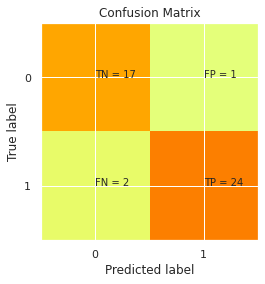

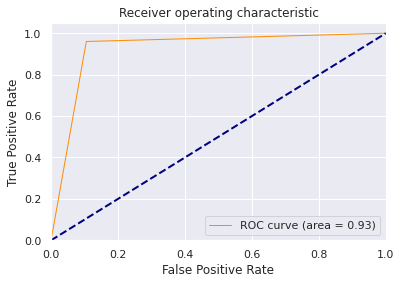


Acuuracy Of the Model:  0.9318181818181818 


LogisticRegression : 


Confusion Matrix:
[[17  1]
 [ 1 25]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       0.96      0.96      0.96        26

    accuracy                           0.95        44
   macro avg       0.95      0.95      0.95        44
weighted avg       0.95      0.95      0.95        44



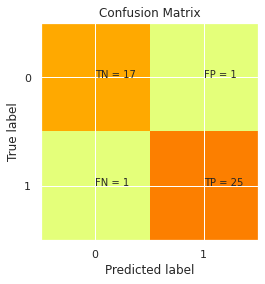

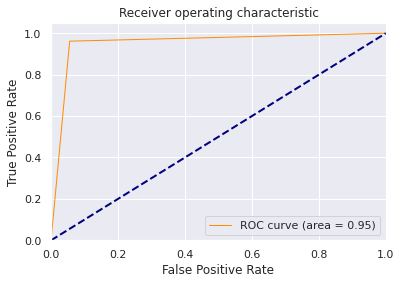


Acuuracy Of the Model:  0.9545454545454546 




In [18]:
#other classifiers
clfs =[LGBMClassifier(random_state=0),ExtraTreesClassifier(random_state=0),GradientBoostingClassifier(random_state=0),AdaBoostClassifier(random_state=0),KNeighborsClassifier(),
          MLPClassifier(alpha=1,random_state=0),GaussianNB(),LogisticRegression(random_state=0)]

for model in clfs:
    print(str(model).split('(')[0],": ")
    model.fit(X_trainval,Y_trainval.ravel())
    X = pd.DataFrame(X_trainval)
    report_performance(model)
    roc_curves(model)
    accuracy(model)



Confusion Matrix:
[[30  0]
 [ 3 67]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        30
           1       1.00      0.96      0.98        70

    accuracy                           0.97       100
   macro avg       0.95      0.98      0.97       100
weighted avg       0.97      0.97      0.97       100



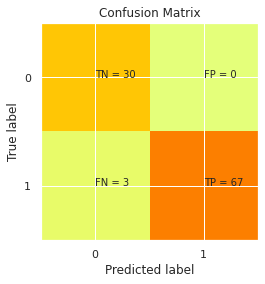

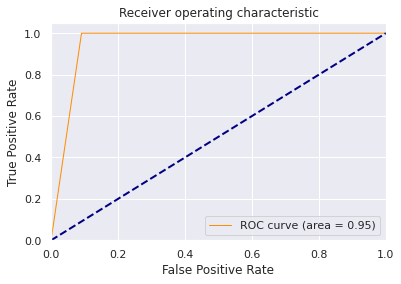


Acuuracy Of the Model:  0.97 




In [ ]:
svm = SVC(kernel="linear", C=0.5,random_state=0)
svm.fit(X_trainval, Y_trainval.ravel())
report_performance(svm)
roc_curves(svm)
accuracy(svm)